In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.optimize import curve_fit

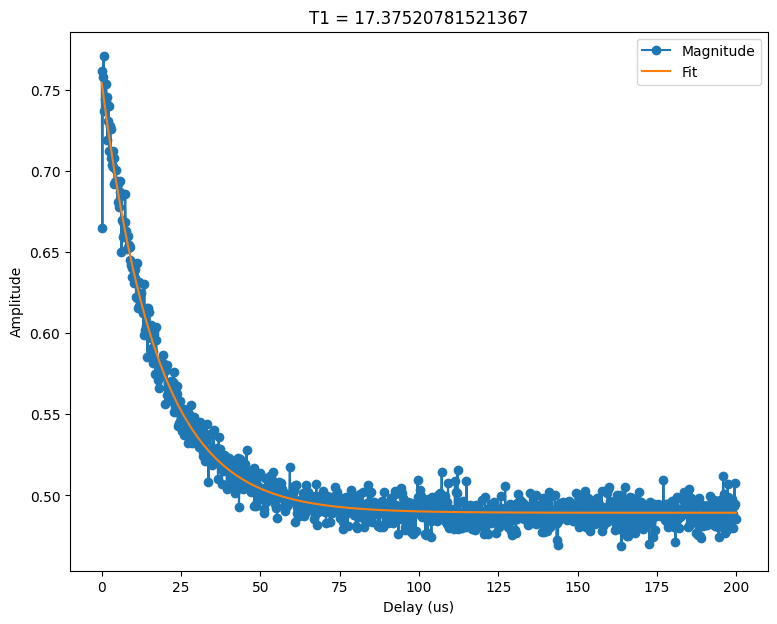

In [7]:
datapath = r"G:\My Drive\chatot\data\t1\2025_05_26\04;57;14" + r"\data.h5"

data = h5py.File(datapath, 'r')

ds = data['ds'][0:-1]
I = data['I'][0:-1]
Q = data['Q'][0:-1]
mag = np.abs(I + 1j * Q)

def model(t, A, B, T1):
    return A + B*np.exp(-t/T1)

params = curve_fit(model, ds, mag)[0]

xs = np.linspace(ds[0], ds[-1], 100)
ys = model(xs, *params)

plt.figure(figsize=(9,7))
plt.title("T1 = " + str(params[2]))
plt.xlabel("Delay (us)")
plt.ylabel("Amplitude")
plt.plot(ds, mag, '-o', label='Magnitude')
plt.plot(xs, ys, label='Fit')
plt.legend()